In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


def load_data(path):
    df = pd.read_csv(path)
    # arham check this later
    # original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
    # split to train test
    train_df, test_df = train_test_split(df, test_size=0.35, random_state=42)
    train_df = train_df.drop(['id'], axis=1).drop_duplicates().reset_index(drop=True)
    test_df = test_df.drop(['id'], axis=1).drop_duplicates().reset_index(drop=True)
    return train_df, test_df

def encode_target(train):
    target_key = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4,'Obesity_Type_II' : 5, 'Obesity_Type_III': 6}
    train['NObeyesdad'] = train['NObeyesdad'].map(target_key)
    return train

def decode_target(train):
    target_key = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}
    train['NObeyesdad'] = train['NObeyesdad'].map(target_key)
    return train

"""Univar functions"""


def make_gender_binary(train):
    gender_key = { 'Male':0, 'Female':1}
    train['Gender'] = train['Gender'].map(gender_key)
    return train

# let's try three types of solutions:


def age_binning(train_df):
    # Binning
    train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 20, 30, 40, 50, train_df['Age'].max()], labels=['0-20', '21-30', '31-40', '41-50', '50+'],)
    return train_df

def age_scaling_log(train_df):
    train_df['Log_Age'] = np.log1p(train_df['Age'])
    return train_df

def age_scaling_minmax(train_df):
    # scaling
    scaler_age = MinMaxScaler()
    train_df['Scaled_Age'] = scaler_age.fit_transform(train_df['Age'].values.reshape(-1, 1))
    return train_df, scaler_age



def height_scaling_log(train_df):
    train_df['Log_Height'] = np.log1p(train_df['Height'])
    return train_df

def height_scaling_minmax(train_df):
    # scaling
    scaler_height = MinMaxScaler()
    train_df['Scaled_Height'] = scaler_height.fit_transform(train_df['Height'].values.reshape(-1, 1))
    return train_df, scaler_height

In [22]:
path = '/Users/arham/Downloads/Projects/01-Dataset/01-Data-for-model-building/train.csv'
train_df,test_df = load_data('/Users/arham/Downloads/Projects/01-Dataset/01-Data-for-model-building/train.csv')


Let's study each column, one by one

# Gender
variable with cardinality two with roughly equal proportion. Can be converted to binary variable for one gender.

In [23]:
train_df['Gender'].value_counts()                                    

Female    6789
Male      6703
Name: Gender, dtype: int64

In [24]:
train_df = make_gender_binary(train_df)

# Age

Skewed Distribution of Age. \
Suggested scaling in future.

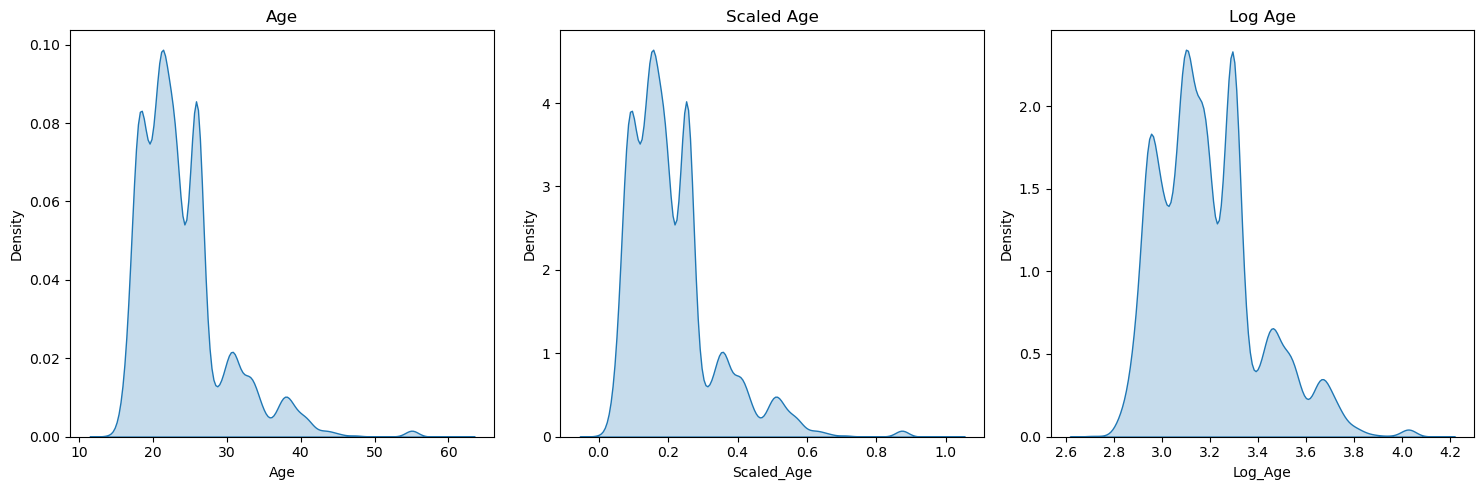

In [25]:


train_df = age_binning(train_df)
train_df = age_scaling_log(train_df)
train_df, scaler_age = age_scaling_minmax(train_df)


# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot KDE plots for each variable
sns.kdeplot(train_df['Age'], fill=True, ax=axes[0])
axes[0].set_title('Age')

sns.kdeplot(train_df['Scaled_Age'], fill=True, ax=axes[1])
axes[1].set_title('Scaled Age')

sns.kdeplot(train_df['Log_Age'], fill=True, ax=axes[2])
axes[2].set_title('Log Age')

# Set common y label
for ax in axes:
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Height

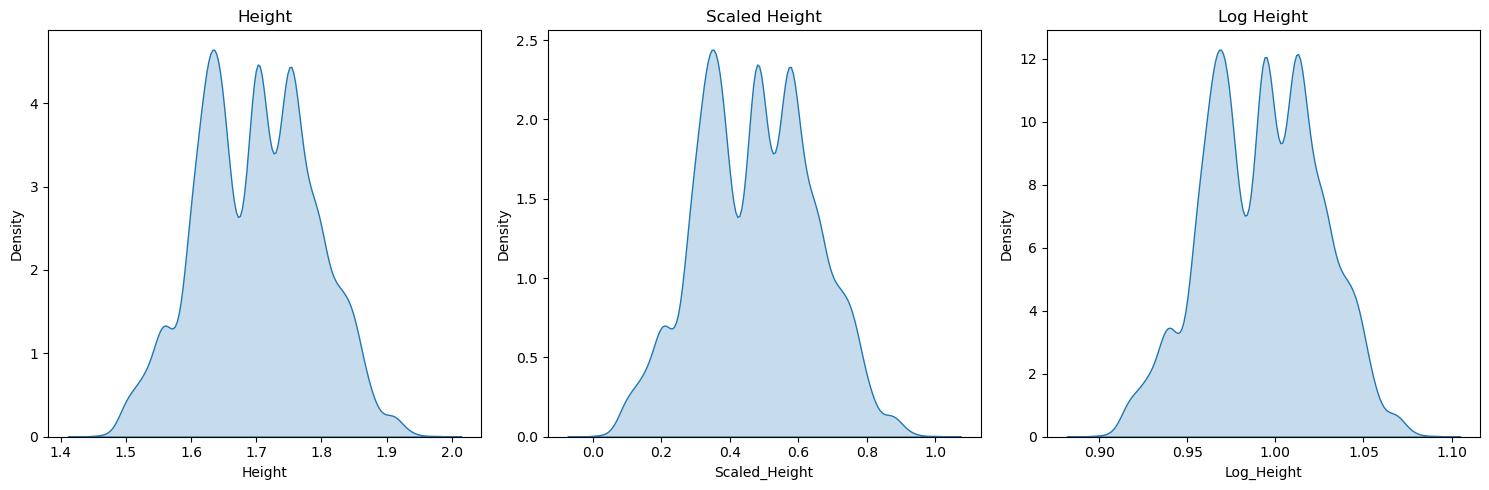

In [27]:
train_df = height_scaling_log(train_df)
train_df, scaler_age = height_scaling_minmax(train_df)


# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot KDE plots for each variable
sns.kdeplot(train_df['Height'], fill=True, ax=axes[0])
axes[0].set_title('Height')

sns.kdeplot(train_df['Scaled_Height'], fill=True, ax=axes[1])
axes[1].set_title('Scaled Height')

sns.kdeplot(train_df['Log_Height'], fill=True, ax=axes[2])
axes[2].set_title('Log Height')

# Set common y label
for ax in axes:
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Weight

Family history

FAVC

FCVC

NCP

SMOKE

CH20

SCC

FAF

TUE

CALC

MTRANS

NObeyesdad

In [20]:
train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')